In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")

In [3]:
train_dataset.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [4]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


# Check For Null Values

In [5]:
#Missing Percentage of all the features
def missing_percentage(df):     
    missing_total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([missing_total, percent], axis=1, keys=['Missing_Total','Percent'])

In [6]:
missing_percentage(train_dataset)

,Missing_Total,Percent


So there is no missing values in train dataset!

In [7]:
#Lets check in test dataset
missing_percentage(test_dataset)

,Missing_Total,Percent


No Missing values in test dataset also

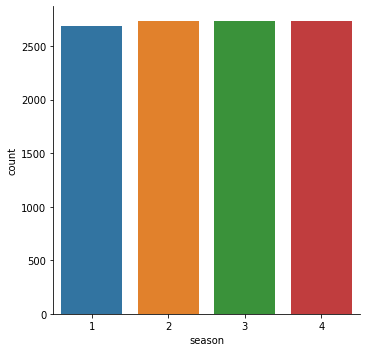

In [8]:
#Lets check the Season Columns
sns.factorplot(x = "season", data = train_dataset, kind = "count", size = 5)

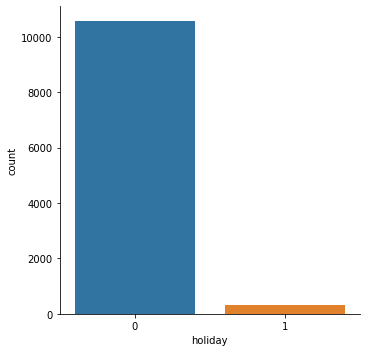

In [9]:
#Check for holidays
sns.factorplot(x = "holiday", data = train_dataset, kind = "count", size = 5)

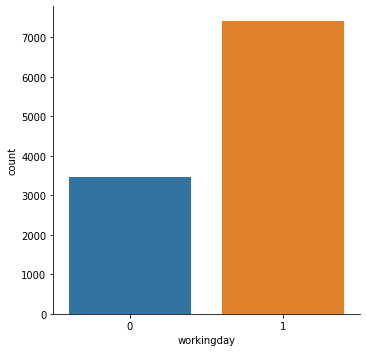

In [10]:
#Checking for working day
sns.factorplot(x = "workingday", data = train_dataset, kind = "count", size = 5)

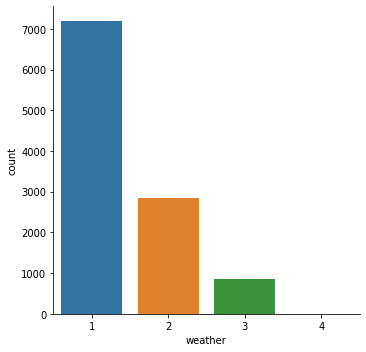

In [11]:
#Checking for weather
sns.factorplot(x = "weather", data = train_dataset, kind = "count",size = 5)

1 = spring,
2 = summer,
3 = fall,
4 = winter

# Data Visualization for continuous variables

In [12]:
train_dataset.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

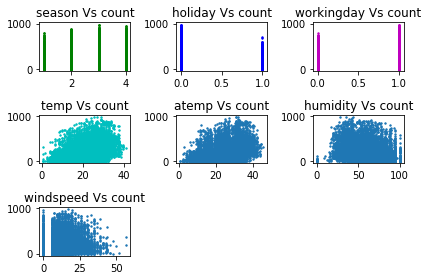

In [13]:
plt.subplot(3,3,1)
plt.title('season Vs count')
plt.scatter(train_dataset['season'], train_dataset['count'], s= 2, c = "g")

plt.subplot(3,3,2)
plt.title('holiday Vs count')
plt.scatter(train_dataset['holiday'], train_dataset['count'], s= 2, c = "b")

plt.subplot(3,3,3)
plt.title('workingday Vs count')
plt.scatter(train_dataset['workingday'], train_dataset['count'], s= 2, c = "m")

plt.subplot(3,3,4)
plt.title('temp Vs count')
plt.scatter(train_dataset['temp'], train_dataset['count'], s= 2, c = "c")

plt.subplot(3,3,5)
plt.title('atemp Vs count')
plt.scatter(train_dataset['atemp'], train_dataset['count'], s= 2)

plt.subplot(3,3,6)
plt.title('humidity Vs count')
plt.scatter(train_dataset['humidity'], train_dataset['count'], s= 2)

plt.subplot(3,3,7)
plt.title('windspeed Vs count')
plt.scatter(train_dataset['windspeed'], train_dataset['count'], s= 2)
plt.tight_layout()

Lets get the avearge of counts for season

<BarContainer object of 4 artists>

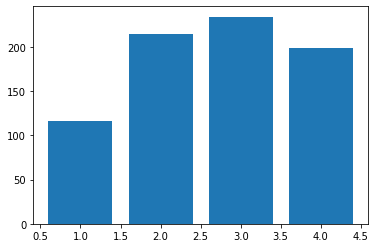

In [14]:
cat_list = train_dataset['season'].unique()
cat_aver = train_dataset.groupby('season').mean()["count"]
plt.bar(cat_list, cat_aver)

Extracting Months Days and Hours

In [15]:
train_dataset["hour"] = [t.hour for t in pd.DatetimeIndex(train_dataset.datetime)]
train_dataset["day"] = [t.dayofweek for t in pd.DatetimeIndex(train_dataset.datetime)]
train_dataset["month"] = [t.month for t in pd.DatetimeIndex(train_dataset.datetime)]
train_dataset['year'] = [t.year for t in pd.DatetimeIndex(train_dataset.datetime)]
train_dataset['year'] = train_dataset['year'].map({2011:0, 2012:1})
train_dataset.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1,0


Make it for Test Dataset

In [16]:
test_dataset["hour"] = [t.hour for t in pd.DatetimeIndex(test_dataset.datetime)]
test_dataset["day"] = [t.dayofweek for t in pd.DatetimeIndex(test_dataset.datetime)]
test_dataset["month"] = [t.month for t in pd.DatetimeIndex(test_dataset.datetime)]
test_dataset['year'] = [t.year for t in pd.DatetimeIndex(test_dataset.datetime)]
test_dataset['year'] = test_dataset['year'].map({2011:0, 2012:1})
test_dataset.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,3,1,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,3,1,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,3,1,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,3,1,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,3,1,0


#Check for outlier

In [17]:
train_dataset['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [18]:
train_dataset['count'].quantile([0.05, 0.1, 0.15, 0.9, 0.95, 0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    452.00
0.95    563.75
0.99    774.15
Name: count, dtype: float64

Drop the Unneccesary columns

In [23]:
#train_dataset.drop(train_dataset['datetime', 'registered', 'casual'], axis=1, inplace=True)
data_prep = train_dataset.drop(['datetime', 'registered', 'casual'], axis=1)

In [24]:
data_prep.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month,year
0,1,0,0,1,9.84,14.395,81,0.0000,16,0,5,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,40,1,5,1,0
2,1,0,0,1,9.02,13.635,80,0.0000,32,2,5,1,0
3,1,0,0,1,9.84,14.395,75,0.0000,13,3,5,1,0
4,1,0,0,1,9.84,14.395,75,0.0000,1,4,5,1,0
5,1,0,0,2,9.84,12.880,75,6.0032,1,5,5,1,0
6,1,0,0,1,9.02,13.635,80,0.0000,2,6,5,1,0
7,1,0,0,1,8.20,12.880,86,0.0000,3,7,5,1,0
8,1,0,0,1,9.84,14.395,75,0.0000,8,8,5,1,0
9,1,0,0,1,13.12,17.425,76,0.0000,14,9,5,1,0


Removing the outliers

In [30]:
Q1 = data_prep.quantile(0.25)
Q3 = data_prep.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

season          2.0000
holiday         0.0000
workingday      1.0000
weather         1.0000
temp           12.3000
atemp          14.3950
humidity       30.0000
windspeed       9.9964
count         242.0000
hour           12.0000
day             4.0000
month           6.0000
year            1.0000
dtype: float64


In [31]:
train_without_outliers =data_prep[~((data_prep < (Q1 - 1.5 * IQR)) |(data_prep > (Q3 + 1.5 * IQR))).any(axis=1)]

In [32]:
X = data_prep[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 'year', 'month', 'day', 'hour','windspeed']]
y = data_prep['count']

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
hour          0
day           0
month         0
year          0
dtype: int64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [36]:
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

# Random Forest

In [38]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [39]:
rf_pred = rf.predict(X_test)

In [46]:
print('MSE:', metrics.mean_squared_error(y_test, rf_pred))

MSE: 0.001822258975160546


# Decision Tree

In [42]:
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [44]:
dt_prediction = dec_reg.predict(X_test)

In [47]:
print('MSE:', metrics.mean_squared_error(y_test, dt_prediction))

MSE: 0.003838656536875049


Let work on test data

In [59]:
test_dataset[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 'year', 'month', 'day', 'hour','windspeed']] \
= sc_X.fit_transform(test_dataset[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 'year', 'month', 'day', 'hour','windspeed']])

In [60]:
test_pred= rf.predict(test_dataset[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 'year', 'month', 'day', 'hour','windspeed']])

test_pred

array([0.01081967, 0.00481557, 0.0028364 , ..., 0.14702869, 0.105     ,
       0.07281762])

In [67]:
test_pred = test_pred.values.reshape(-1,1)
test_pred = sc_y.inverse_transform(test_pred)
test_pred = pd.DataFrame(test_pred, columns=['count'])
df = pd.concat([test_dataset['datetime'], test_pred],axis=1)

In [68]:
df.head()

,datetime,count
0,2011-01-20 00:00:00,11085.356393
1,2011-01-20 01:00:00,5470.990061
2,2011-01-20 02:00:00,3620.281916
3,2011-01-20 03:00:00,3124.557716
4,2011-01-20 04:00:00,2637.756269
